In [206]:
pip install yfinance


     |████████████████████████████████| 6.3 MB 6.2 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [207]:
import numpy as np
import pandas as pd
import yfinance as yf


# to scrap the the stock data from yahoo finance 
def scrapStocks(stocklist,duration):
  for stock in stocklist:
    data_df=yf.download(stock,period=duration)
    data_df.to_csv(stock+'.csv')

# It will create the files for all the stocks
stocksName=['ADANIPOWER.NS','TATAPOWER.NS','RPOWER.NS','JKCEMENT.NS','AMBUJACEM.NS','ACC.NS']
scrapStocks(stocksName,"90d")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [238]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression  
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score


# Reading the consolidated file of stocks
df= pd.read_csv('stockData.csv')


# New Section

In [239]:
# droping the null values
df=df.dropna()

In [240]:
# with six input features
data = df[['OPEN','LOW','CLOSE','NO. OF SHARES', 'NO. OF TRADES', 'Tata powers']]
output =df[['HIGH']]


In [241]:
print(len(data))
#Splitting between training and test 90,10 split

Xtrain= data[: int(0.9*len(data))]
Ytrain= output[: int(0.9*len(data))]
Xtest1=data[int(0.9*len(data)) :]
Ytest= output[int(0.9*len(data)):]

446


In [242]:
model1 = LinearRegression()
model1.fit(Xtrain,Ytrain)
model1.coef_


# calculating Mean Squared Error 
print('MSE test %.3f' % (mean_squared_error(model1.predict(Xtest1), Ytest)))
# calculating R-Squared
print('R^2  test: %.3f' % (r2_score(model1.predict(Xtest1), Ytest)))
# calculating absolute error
print('MAE test: %.3f' % (mean_absolute_error(model1.predict(Xtest1), Ytest)))
# calculating absolute percentage error
print('MAPE test: %.3f' % (mean_absolute_percentage_error(model1.predict(Xtest1), Ytest)))



MSE test 0.941
R^2  test: 0.843
MAE test: 0.492
MAPE test: 0.010


In [243]:
# adding new featires with rolling 3point and 5 point average

df['MVA3'] = df['OPEN'].shift(1).rolling(window=3).mean() 
df['MVA5']= df['OPEN'].shift(1).rolling(window=5).mean() 

In [244]:
df=df.dropna()
df.head(10)


,DATE,OPEN,HIGH,LOW,CLOSE,NO. OF SHARES,NO. OF TRADES,Tata powers,MVA3,MVA5
5,24-11-2021,106.85,109.75,105.55,105.95,699090.0,7939.0,250.60,106.766667,105.53
6,23-11-2021,100.60,105.95,98.65,105.95,3987471.0,35113.0,245.90,106.900000,106.09
7,23-11-2021,100.90,105.90,98.70,105.90,493284.0,4755.0,243.15,104.816667,105.55
8,22-11-2021,102.90,103.25,98.80,100.95,3723327.0,50374.0,242.00,102.783333,104.44
9,22-11-2021,102.95,103.30,98.80,100.90,1114257.0,20643.0,242.00,101.466667,103.65
10,18-11-2021,105.00,105.80,101.40,102.90,3970297.0,43253.0,237.90,102.250000,102.84
11,18-11-2021,105.00,105.70,101.45,102.95,441624.0,6081.0,241.90,103.616667,102.47
12,17-11-2021,106.50,107.70,104.00,104.30,4122988.0,38428.0,237.10,104.316667,103.35
13,17-11-2021,106.65,107.75,104.00,104.25,838121.0,13941.0,233.20,105.500000,104.47
14,16-11-2021,107.60,109.80,106.25,106.75,2919587.0,26513.0,232.90,106.050000,105.22


In [245]:
data = df[['OPEN','LOW','CLOSE','NO. OF SHARES', 'NO. OF TRADES', 'Tata powers','MVA3','MVA5']]
output =df[['HIGH']]

In [246]:
data

,OPEN,LOW,CLOSE,NO. OF SHARES,NO. OF TRADES,Tata powers,MVA3,MVA5
5,106.85,105.55,105.95,699090.0,7939.0,250.60,106.766667,105.53
6,100.60,98.65,105.95,3987471.0,35113.0,245.90,106.900000,106.09
7,100.90,98.70,105.90,493284.0,4755.0,243.15,104.816667,105.55
8,102.90,98.80,100.95,3723327.0,50374.0,242.00,102.783333,104.44
9,102.95,98.80,100.90,1114257.0,20643.0,242.00,101.466667,103.65
...,...,...,...,...,...,...,...,...
441,49.10,49.10,49.80,989589.0,4641.0,55.80,49.966667,50.46
442,50.70,49.90,50.20,6557749.0,18943.0,55.75,49.666667,50.04
443,50.85,49.90,50.20,1168670.0,5069.0,57.35,49.900000,49.94
444,49.80,49.80,50.15,4126797.0,15450.0,57.90,50.216667,50.11


In [247]:
data
print(len(data))
#Splitting between training and test 90,10 split

Xtrain= data[: int(0.9*len(data))]
Ytrain= output[: int(0.9*len(data))]
Xtest=data[int(0.9*len(data)) :]
Ytest= output[int(0.9*len(data)):]


441


In [248]:
# training the Linear Regression model

model = LinearRegression()
model.fit(Xtrain,Ytrain)


LinearRegression()

In [249]:
model.coef_

array([[ 5.70396078e-01, -2.45376962e-01,  7.41272934e-01,
        -6.65523335e-08,  2.36073990e-05, -2.36305332e-03,
        -2.27216425e-02, -3.35344661e-02]])

In [250]:

# Error estimation with new features
# calculating Mean Squared Error 
print('MSE test %.3f' % (mean_squared_error(model.predict(Xtest), Ytest)))
# calculating R-Squared
print('R^2  test: %.3f' % (r2_score(model.predict(Xtest), Ytest)))
# calculating absolute error
print('MAE test: %.3f' % (mean_absolute_error(model.predict(Xtest), Ytest)))
# calculating absolute percentage error
print('MAE test: %.3f' % (mean_absolute_percentage_error(model.predict(Xtest), Ytest)))

MSE test 0.753
R^2  test: 0.869
MAE test: 0.504
MAE test: 0.010


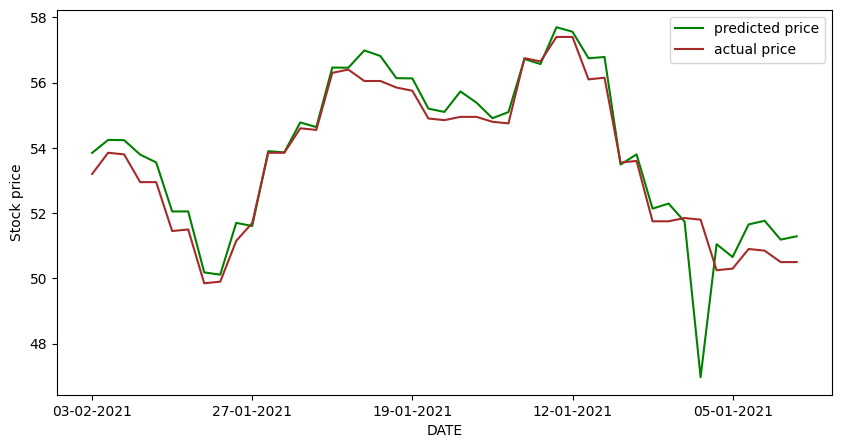

In [251]:
#plotting the results

import matplotlib.pyplot as plt
plt.style.use('default')

plt.figure(figsize=(10, 5), dpi=100)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
predicted_price = pd.DataFrame(zip(model.predict(Xtest),Ytest.iloc[:, 0]),date1,columns=['prediction','test'])
predicted_price['prediction']=predicted_price['prediction'].astype(float)
predicted_price['prediction'].plot(label='predicted price', color='Green')
predicted_price.test.plot(label='actual price',color='brown') 
# adding title to the plot
plt.ylabel('Stock price')
  
# adding Label to the x-axis  
# adding legend to the curve
plt.legend()

In [252]:
# training lasso regression
dictParm={}
dictIntercept={}
mean_error=[]; std_error=[]
Ci_range = [ 0.5, 1, 5, 10,70,90,100,150,200, 500]
from sklearn.linear_model import Lasso
for Ci in Ci_range:
  model3 = Lasso(alpha=1/(2*Ci))
  model3.fit(Xtrain,Ytrain)
  ypred = model3.predict(Xtest)
  print("Lasso Regression for C= "+str(Ci))
  print("Coefficient =" +str(model3.coef_))
  print("Theta0 =" +str(model3.intercept_))
  mean_error.append(mean_squared_error(model3.predict(Xtest),Ytest))
  param=model3.coef_
  dictParm[Ci]=param
  dictIntercept[Ci]=model3.intercept_

Lasso Regression for C= 0.5
Coefficient =[ 4.41271139e-01  0.00000000e+00  5.69355917e-01 -1.04063911e-07
  3.64231829e-05 -2.10711448e-03  0.00000000e+00  0.00000000e+00]
Theta0 =[0.97697133]
Lasso Regression for C= 1
Coefficient =[ 4.42188514e-01 -0.00000000e+00  5.70925390e-01 -1.01858263e-07
  3.56589698e-05 -2.63955054e-03  0.00000000e+00  0.00000000e+00]
Theta0 =[0.80104615]
Lasso Regression for C= 5
Coefficient =[ 5.26005248e-01 -1.57316853e-01  6.63976343e-01 -8.12304904e-08
  2.82817742e-05 -2.68436932e-03 -0.00000000e+00 -2.09277205e-02]
Theta0 =[0.69295372]
Lasso Regression for C= 10
Coefficient =[ 5.46568424e-01 -2.00259494e-01  6.98266035e-01 -7.44959823e-08
  2.60814829e-05 -2.54208732e-03 -0.00000000e+00 -3.37797259e-02]
Theta0 =[0.70593539]
Lasso Regression for C= 70
Coefficient =[ 5.66819421e-01 -2.38731350e-01  7.34686171e-01 -6.77525147e-08
  2.39774399e-05 -2.39063898e-03 -1.85909596e-02 -3.40434369e-02]
Theta0 =[0.69805478]
Lasso Regression for C= 90
Coefficient =[

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.715e+02, tolerance: 1.592e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.445e+02, tolerance: 1.592e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

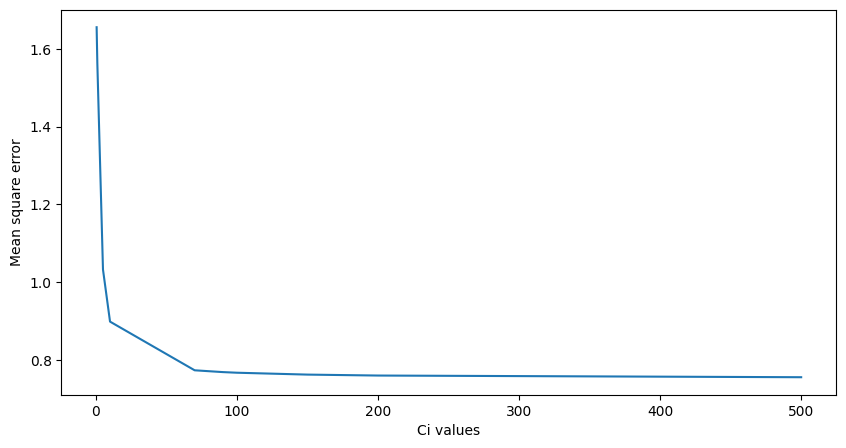

In [253]:
import matplotlib.pyplot as plt
plt.style.use('default')

plt.figure(figsize=(10, 5), dpi=100)
plt.plot(Ci_range,mean_error,'-')
plt.xlabel('Ci values')
plt.ylabel('Mean square error')
plt.show()

In [254]:
# selecting the best value from above calculation
Ci=70
model3 = Lasso(alpha=1/(2*Ci))
model3.fit(Xtrain,Ytrain)
ypred = model.predict(Xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.195e+02, tolerance: 1.592e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [255]:
# calculating Mean Squared Error with new features
print('MSE test %.3f' % (mean_squared_error(model3.predict(Xtest), Ytest)))
# calculating R-Squared
print('R^2  test: %.3f' % (r2_score(model3.predict(Xtest), Ytest)))
# calculating absolute error
print('MAE test: %.3f' % (mean_absolute_error(model3.predict(Xtest), Ytest)))
# calculating absolute percentage error
print('MAE test: %.3f' % (mean_absolute_percentage_error(model3.predict(Xtest), Ytest)))

MSE test 0.774
R^2  test: 0.866
MAE test: 0.508
MAE test: 0.010


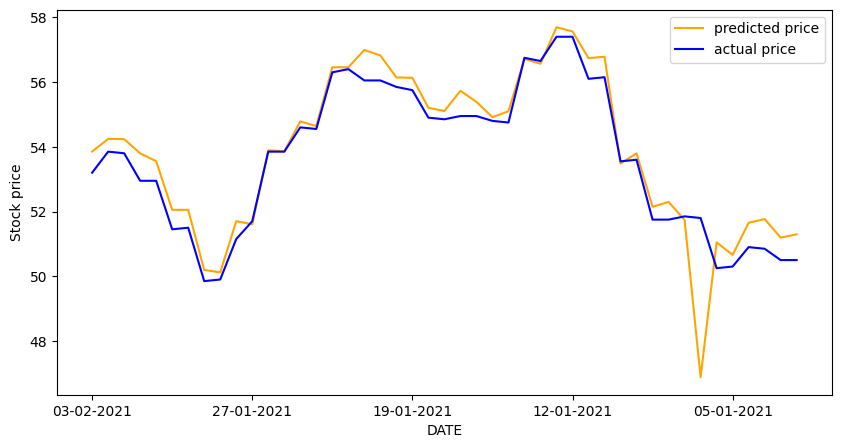

In [256]:
import matplotlib.pyplot as plt
plt.style.use('default')

plt.figure(figsize=(10, 5), dpi=100)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
predicted_price = pd.DataFrame(zip(model3.predict(Xtest),Ytest.iloc[:, 0]),date1,columns=['prediction','test'])
predicted_price['prediction']=predicted_price['prediction'].astype(float)
predicted_price.prediction.plot(label='predicted price', color='orange')
predicted_price.test.plot(label='actual price',color='blue') 
# adding title to the plot
plt.ylabel('Stock price')
  
# adding Label to the x-axis  
# adding legend to the curve
plt.legend()

In [257]:
# training the support vector regression model

from sklearn.svm import SVR
model2 = SVR(kernel = 'rbf')
model2.fit(Xtrain, Ytrain.values.ravel())

SVR()

In [258]:

# calculating Mean Squared Error with new features
print('MSE test %.3f' % (mean_squared_error(model2.predict(Xtest), Ytest)))
# calculating R-Squared
print('R^2  test: %.3f' % (r2_score(model2.predict(Xtest), Ytest)))
# calculating absolute error
print('MAE test: %.3f' % (mean_absolute_error(model2.predict(Xtest), Ytest)))
# calculating absolute percentage error
print('MAE test: %.3f' % (mean_absolute_percentage_error(model2.predict(Xtest), Ytest)))

MSE test 2190.369
R^2  test: -8445.814
MAE test: 46.740
MAE test: 0.466


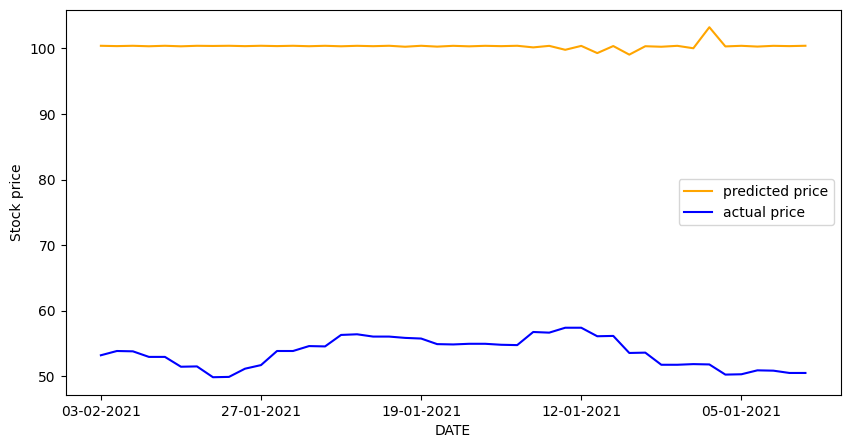

In [259]:
# plotting
import matplotlib.pyplot as plt
plt.style.use('default')

plt.figure(figsize=(10, 5), dpi=100)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
predicted_price = pd.DataFrame(zip(model2.predict(Xtest),Ytest.iloc[:, 0]),date1,columns=['prediction','test'])
predicted_price['prediction']=predicted_price['prediction'].astype(float)
predicted_price.prediction.plot(label='predicted price', color='orange')
predicted_price.test.plot(label='actual price',color='blue') 
# adding title to the plot
plt.ylabel('Stock price')
  
# adding Label to the x-axis  
# adding legend to the curve
plt.legend()

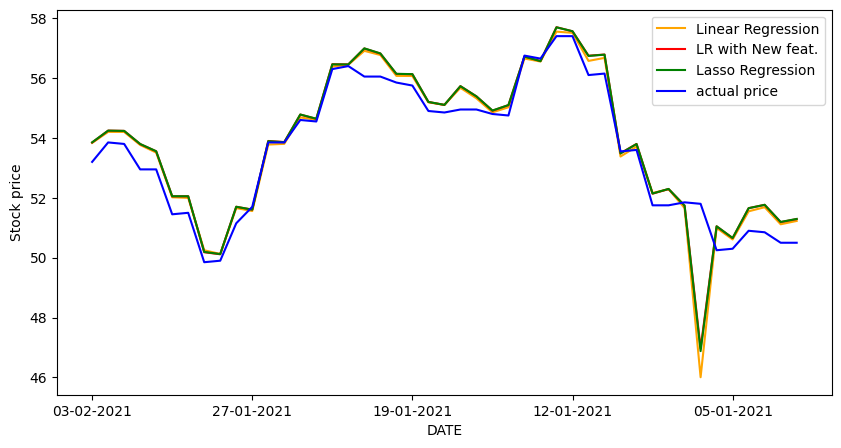

In [265]:
# plotting all the results in same graph

plt.figure(figsize=(10, 5), dpi=100)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
predicted_price1 = pd.DataFrame(zip(model1.predict(Xtest1),Ytest.iloc[:, 0]),date1,columns=['prediction','test'])
predicted_price2 = pd.DataFrame(zip(model.predict(Xtest),Ytest.iloc[:, 0]),date1,columns=['prediction','test'])
predicted_price3 = pd.DataFrame(zip(model3.predict(Xtest),Ytest.iloc[:, 0]),date1,columns=['prediction','test'])
predicted_price4 = pd.DataFrame(zip(model2.predict(Xtest),Ytest.iloc[:, 0]),date1,columns=['prediction','test'])

predicted_price1['prediction']=predicted_price1['prediction'].astype(float)
predicted_price2['prediction']=predicted_price2['prediction'].astype(float)
predicted_price3['prediction']=predicted_price3['prediction'].astype(float)
predicted_price4['prediction']=predicted_price4['prediction'].astype(float)

predicted_price1.prediction.plot(label='Linear Regression', color='orange')
predicted_price2.prediction.plot(label='LR with New feat.',color='red')
predicted_price3.prediction.plot(label='Lasso Regression',color='green')
#predicted_price4.prediction.plot(label='Support Vector Regression')
predicted_price.test.plot(label='actual price',color='blue') 
# adding title to the plot
plt.ylabel('Stock price')
  
# adding Label to the x-axis  
# adding legend to the curve
plt.legend()

In [356]:
stockprofile = []
stocksName=['ADANIPOWER.NS','TATAPOWER.NS','RPOWER.NS','JKCEMENT.NS','AMBUJACEM.NS','ACC.NS']
for stock in stocksName:
  info=[]
  ticker = yf.Ticker(stock)
  info.append(stock)
  info.append(ticker.info['industry'])
  info.append(ticker.info['totalRevenue'])
  info.append(ticker.info['volume'])
  info.append(ticker.info['sector'])
  stockprofile.append(info)
df1 = pd.DataFrame(stockprofile, columns = ['Name','industry','totalRevenue','volume','sector'])
df1.to_csv('StockInfo.csv')

In [357]:
df1

,Name,industry,totalRevenue,volume,sector
0,ADANIPOWER.NS,Utilities—Independent Power Producers,250209599488,2364397,Utilities
1,TATAPOWER.NS,Utilities—Independent Power Producers,378678706176,34376491,Utilities
2,RPOWER.NS,Utilities—Renewable,74128097280,12553808,Utilities
3,JKCEMENT.NS,Building Materials,75760254976,67684,Basic Materials
4,AMBUJACEM.NS,Building Materials,287930515456,1157040,Basic Materials
5,ACC.NS,Building Materials,160706297856,234940,Basic Materials


In [358]:
df1['industry']=df1['industry'].map({'Utilities—Independent Power Producers':'1', 'Utilities—Renewable':'2', 'Building Materials': '3'})
df1['sector']=df1['sector'].map({'Utilities':'1','Basic Materials':'2'})

In [359]:
df1

,Name,industry,totalRevenue,volume,sector
0,ADANIPOWER.NS,1,250209599488,2364397,1
1,TATAPOWER.NS,1,378678706176,34376491,1
2,RPOWER.NS,2,74128097280,12553808,1
3,JKCEMENT.NS,3,75760254976,67684,2
4,AMBUJACEM.NS,3,287930515456,1157040,2
5,ACC.NS,3,160706297856,234940,2


In [362]:
from sklearn import svm
model4 = svm.SVC()
X =df1[['totalRevenue','volume','sector']][1:]
y=df1[['industry']][1:]
xtest =df1[['totalRevenue','volume','sector']][:1]

In [363]:
model4.fit(X,y.values.ravel()) 

SVC()

In [365]:
model4.predict(xtest)

array(['3'], dtype=object)